In [23]:
import pandas as pd
import numpy as np

df = pd.read_csv("dogs-ranking-dataset.csv")
display(df.head())



,Breed,type,score,popularity ranking,size,intelligence,congential ailments,score for kids,size.1,$LIFETIME COST,INTELLIGENCE RANK,INTELLIGENCE %,LONGEVITY(YEARS),NUMBER OF GENETIC AILMENTS,GENETIC AILMENTS,PURCHASE PRICE,FOOD COSTS PER YEAR,GROOMING FREQUNCY,SUITABILITY FOR CHILDREN
0,Border Terrier,terrier,3.61,61,1,Above average,none,4.99,small,"$22,638",30,70%,14.00,0,none,$833,$324,Once a week,1
1,Cairn Terrier,terrier,3.53,48,1,Above average,"'lion jaw', heart problems",4.91,small,"$21,992",35,61%,13.84,2,"'lion jaw', heart problems",$435,$324,Once a week,1
2,Siberian Husky,working,3.22,16,2,Average,none,4.72,medium,"$22,049",45,45%,12.58,0,none,$650,$466,Once in a few weeks,1
3,Welsh Springer Spaniel,sporting,3.34,81,2,Above average,hip problems,4.71,medium,"$20,224",31,69%,12.49,1,hip problems,$750,$324,Once a week,1
4,English Cocker Spaniel,sporting,3.33,51,2,Excellent,none,4.70,medium,"$18,993",18,82%,11.66,0,none,$800,$324,Once a week,1


In [25]:
traits = df[['type','popularity ranking', 'size', 'intelligence', 'score for kids', 'congential ailments', 'LONGEVITY(YEARS)', 'PURCHASE PRICE']]
breeds = df['Breed'].tolist()

display(traits.head())

,type,popularity ranking,size,intelligence,score for kids,congential ailments,LONGEVITY(YEARS),PURCHASE PRICE
0,terrier,61,1,Above average,4.99,none,14.00,$833
1,terrier,48,1,Above average,4.91,"'lion jaw', heart problems",13.84,$435
2,working,16,2,Average,4.72,none,12.58,$650
3,sporting,81,2,Above average,4.71,hip problems,12.49,$750
4,sporting,51,2,Excellent,4.70,none,11.66,$800


In [26]:
#1. making jaccard function

def jaccard(a, b):
    union = np.sum(a.values == b.values)
    total = len(a) ## 7 traits total
    return union / total


In [27]:
# 2. Create empty similarity matrix


similarity = np.zeros((len(df), len(df)))


In [28]:
## Matrix fucntion building, storing the simialities of comparing breed 1 and breed 2

for i in range(len(df)):
    for j in range(len(df)):
        similarity[i,j] = jaccard(traits.iloc[i], traits.iloc[j])



In [29]:
## lets see the jaccard similarty matrix, look for the triangluar

similarity_df = pd.DataFrame(similarity, index=breeds, columns=breeds)
display(similarity_df)

,Border Terrier,Cairn Terrier,Siberian Husky,Welsh Springer Spaniel,English Cocker Spaniel,Cocker Spaniel,Lhasa Apso,English Springer Spaniel,Shetland Sheepdog,West Highland White Terrier,...,Pekingese,Rhodesian Ridgeback,Bull Terrier,Saint Bernard,Borzoi,Alaskan Malamute,Bloodhound,Chow Chow,Akita,Bulldog
Border Terrier,1.000,0.375,0.125,0.125,0.125,0.125,0.125,0.000,0.125,0.250,...,0.125,0.000,0.125,0.000,0.125,0.000,0.000,0.000,0.000,0.000
Cairn Terrier,0.375,1.000,0.000,0.125,0.000,0.125,0.125,0.000,0.125,0.250,...,0.125,0.000,0.125,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Siberian Husky,0.125,0.000,1.000,0.125,0.250,0.000,0.000,0.125,0.000,0.125,...,0.000,0.125,0.125,0.125,0.125,0.250,0.000,0.125,0.250,0.125
Welsh Springer Spaniel,0.125,0.125,0.125,1.000,0.250,0.125,0.000,0.250,0.000,0.000,...,0.000,0.000,0.125,0.000,0.000,0.000,0.000,0.125,0.125,0.125
English Cocker Spaniel,0.125,0.000,0.250,0.250,1.000,0.250,0.000,0.375,0.000,0.000,...,0.000,0.000,0.125,0.000,0.125,0.000,0.000,0.125,0.000,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Alaskan Malamute,0.000,0.000,0.250,0.000,0.000,0.000,0.000,0.000,0.000,0.125,...,0.000,0.250,0.000,0.250,0.125,1.000,0.125,0.000,0.375,0.000
Bloodhound,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.125,0.250,0.000,0.125,0.375,0.125,1.000,0.125,0.125,0.125
Chow Chow,0.000,0.000,0.125,0.125,0.125,0.000,0.125,0.125,0.000,0.000,...,0.125,0.000,0.125,0.000,0.125,0.000,0.125,1.000,0.000,0.375
Akita,0.000,0.000,0.250,0.125,0.000,0.000,0.000,0.000,0.000,0.125,...,0.000,0.250,0.000,0.250,0.125,0.375,0.125,0.000,1.000,0.000


In [30]:
def get_similar(breed, top=5):
    idx = breeds.index(breed)
    sims = similarity[idx]
    pairs = list(zip(breeds, sims))
    pairs_sorted = sorted(pairs, key=lambda x: x[1], reverse=True)
    filtered = [(p[0], f"{p[1]*100:.0f}% similar") for p in pairs_sorted if p[0] != breed]
    return filtered[:top]

In [31]:
get_similar('Bulldog')

[('Chow Chow', '38% similar'),
 ('Boston Terrier', '25% similar'),
 ('Dalmatian', '25% similar'),
 ('Poodle', '25% similar'),
 ('Basenji', '25% similar')]

NOW MOVING ONTO HIERARCHICAL CLUSTERING

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

traits2 = df[['INTELLIGENCE %', 'LONGEVITY(YEARS)','score for kids']]

traits2['INTELLIGENCE %'] = traits2['INTELLIGENCE %'].str.replace('%', '', regex=False).astype(float) / 100

display(traits2.head())


/tmp/ipython-input-430802317.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traits2['INTELLIGENCE %'] = traits2['INTELLIGENCE %'].str.replace('%', '', regex=False).astype(float) / 100


,INTELLIGENCE %,LONGEVITY(YEARS),score for kids
0,0.70,14.00,4.99
1,0.61,13.84,4.91
2,0.45,12.58,4.72
3,0.69,12.49,4.71
4,0.82,11.66,4.70


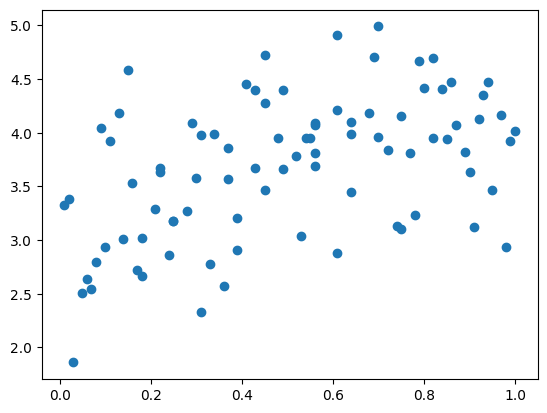

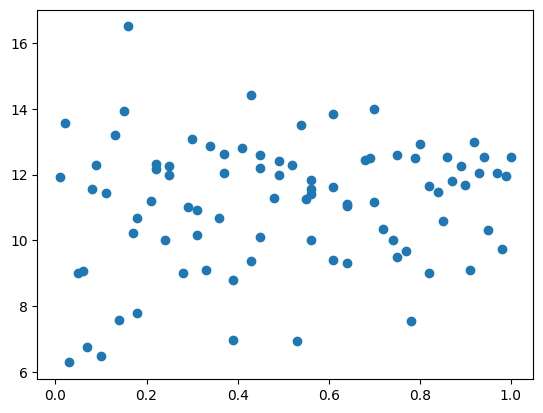

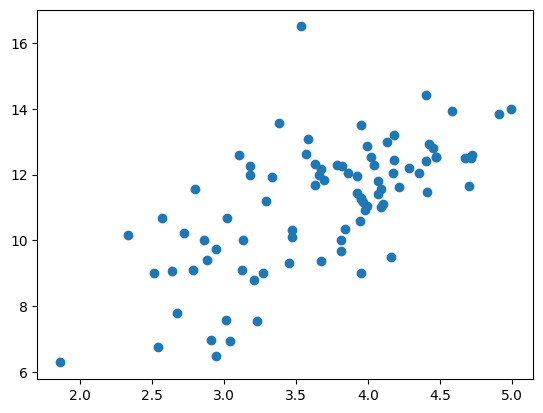

In [45]:
plt.scatter(traits2['INTELLIGENCE %'], traits2['score for kids'])
plt.show()




plt.scatter(traits2['INTELLIGENCE %'], traits2['LONGEVITY(YEARS)'])
plt.show()



plt.scatter(traits2['score for kids'], traits2['LONGEVITY(YEARS)'])
plt.show()

[(0.7, 14.0, 4.99), (0.61, 13.84, 4.91), (0.45, 12.58, 4.72), (0.69, 12.49, 4.71), (0.82, 11.66, 4.7), (0.79, 12.5, 4.67), (0.15, 13.92, 4.58), (0.86, 12.54, 4.47), (0.94, 12.53, 4.47), (0.41, 12.8, 4.45), (0.8, 12.92, 4.42), (0.84, 11.46, 4.41), (0.49, 12.42, 4.4), (0.43, 14.42, 4.4), (0.93, 12.04, 4.35), (0.45, 12.21, 4.28), (0.61, 11.63, 4.21), (0.68, 12.44, 4.18), (0.13, 13.2, 4.18), (0.97, 12.04, 4.17), (0.75, 9.48, 4.16), (0.92, 13.0, 4.13), (0.64, 11.1, 4.1), (0.56, 11.57, 4.09), (0.29, 11.0, 4.09), (0.56, 11.42, 4.07), (0.87, 11.81, 4.07), (0.09, 12.3, 4.04), (1.0, 12.52, 4.02), (0.64, 11.05, 3.99), (0.34, 12.87, 3.99), (0.31, 10.92, 3.98), (0.7, 11.17, 3.96), (0.54, 13.51, 3.95), (0.48, 11.29, 3.95), (0.55, 11.27, 3.95), (0.82, 9.02, 3.95), (0.85, 10.6, 3.94), (0.11, 11.43, 3.92), (0.99, 11.95, 3.92), (0.37, 12.05, 3.86), (0.72, 10.34, 3.84), (0.89, 12.25, 3.82), (0.56, 10.0, 3.81), (0.77, 9.67, 3.81), (0.52, 12.28, 3.78), (0.56, 11.83, 3.69), (0.22, 12.17, 3.67), (0.43, 9.36,

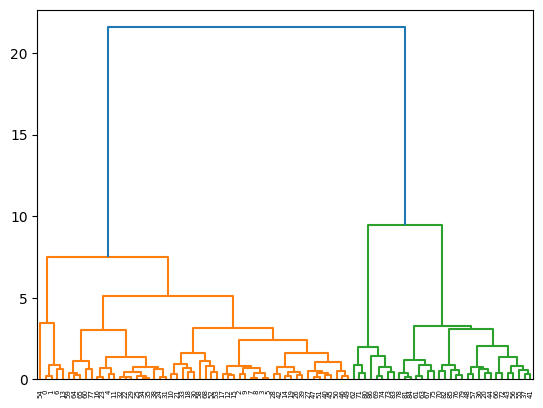

In [46]:
data = list(zip(traits2['INTELLIGENCE %'], traits2['LONGEVITY(YEARS)'], traits2['score for kids']))
print(data)


linkage_data = linkage(data, method='ward', metric='euclidean')

dendrogram(linkage_data)
plt.show()



In [47]:
hierarchial_cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')

labels = hierarchial_cluster.fit_predict(data)
print(labels)

[0 0 3 3 4 3 0 3 3 3 3 4 3 0 3 3 4 3 3 3 1 3 4 4 4 4 3 3 3 4 3 4 4 3 4 4 1
 1 4 3 3 1 3 1 1 3 3 3 1 3 3 3 3 3 0 1 1 1 3 4 4 1 2 1 4 4 1 1 3 2 1 2 1 2
 2 1 1 4 1 1 2 1 1 2 1 1 2]


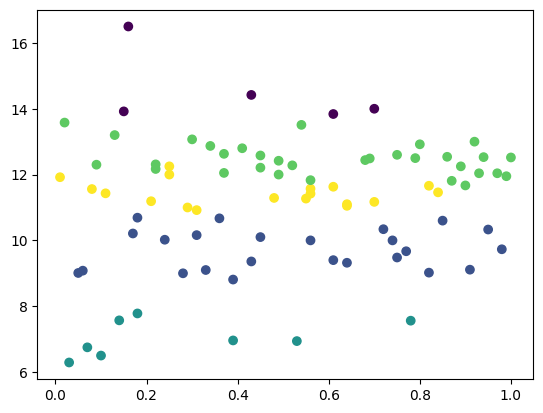

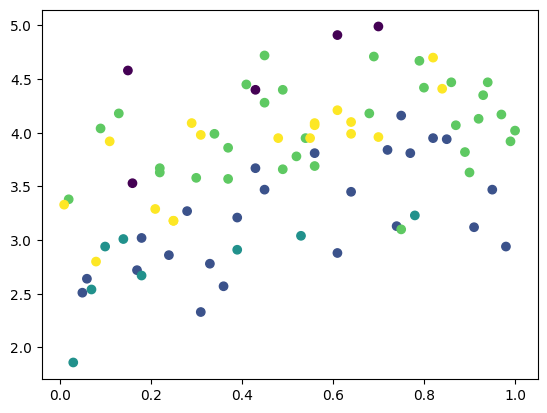

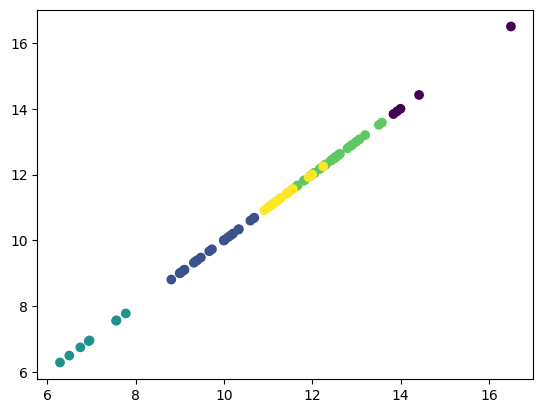

In [49]:
plt.scatter(traits2['INTELLIGENCE %'], traits2['LONGEVITY(YEARS)'], c=labels)
plt.show()


plt.scatter(traits2['INTELLIGENCE %'], traits2['score for kids'], c=labels)
plt.show()


plt.scatter(traits2['LONGEVITY(YEARS)'], traits2['LONGEVITY(YEARS)'], c=labels)
plt.show()